In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='nEfTPSN1zlnKEEqcG6mHLtxw95FJ816KOItlxgDilyxB',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'mobilepriceclassification-donotdelete-pr-vtvvjlpug8aaqy'
object_key = 'train.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


## Data Analysis

In [4]:
df_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
df_data_1.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


### How does ram is affected by price

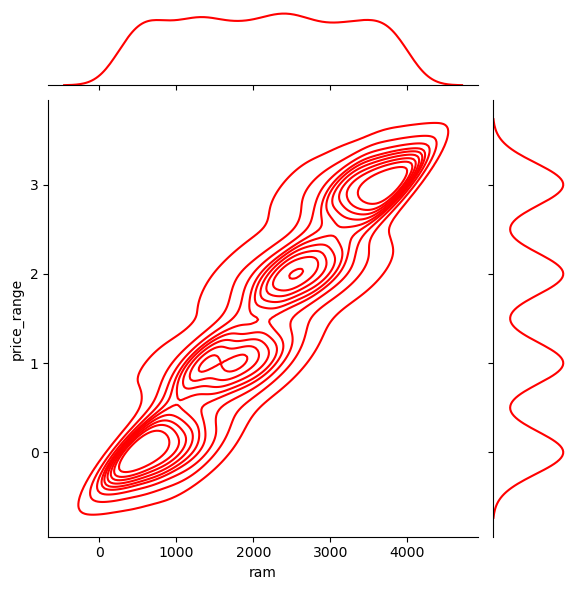

In [6]:
sns.jointplot(x='ram',y='price_range',data=df_data_1,color='red',kind='kde');

### Battery power vs Price Range

<AxesSubplot:xlabel='price_range', ylabel='battery_power'>

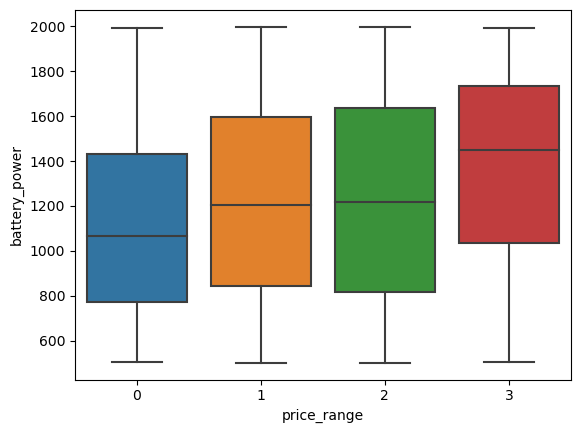

In [7]:
sns.boxplot(x="price_range", y="battery_power", data=df_data_1)

### No of Phones vs Camera megapixels of front and primary camera

Text(0.5, 0, 'MegaPixels')

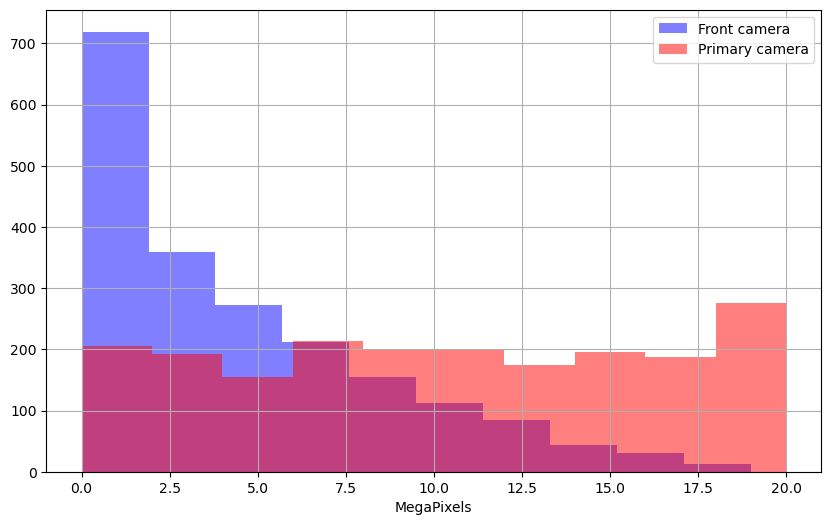

In [8]:
plt.figure(figsize=(10,6))
df_data_1['fc'].hist(alpha=0.5,color='blue',label='Front camera')
df_data_1['pc'].hist(alpha=0.5,color='red',label='Primary camera')
plt.legend()
plt.xlabel('MegaPixels')

In [9]:
# X=dataset.drop('price_range',axis=1)
X = df_data_1[['dual_sim','battery_power','four_g','n_cores','touch_screen','ram']]

In [10]:
y=df_data_1['price_range']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [14]:
knn.score(X_test,y_test)

0.8151515151515152

In [15]:
### Elbow Method For optimum value of K

error_rate = []
for i in range(1,20):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

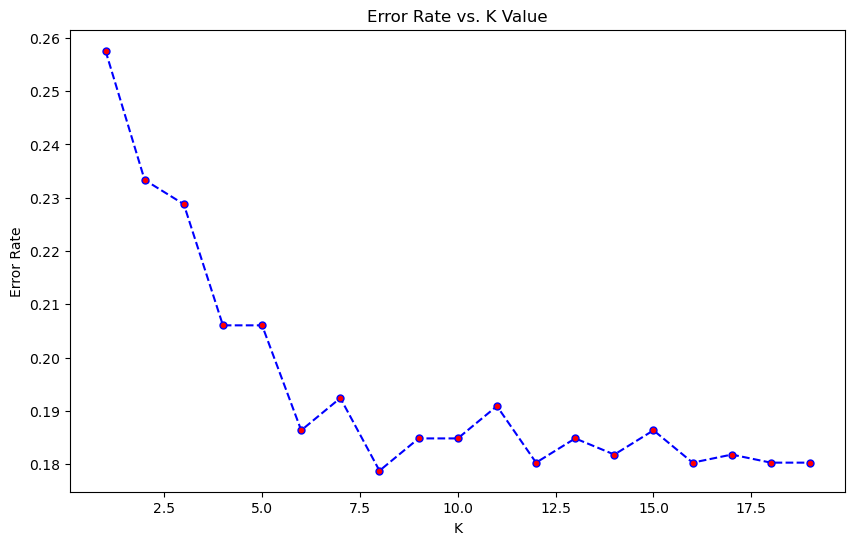

In [16]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [17]:
from sklearn.metrics import classification_report,confusion_matrix

In [18]:
pred = knn.predict(X_test)

In [19]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90       158
           1       0.74      0.81      0.77       152
           2       0.82      0.71      0.76       199
           3       0.82      0.87      0.85       151

    accuracy                           0.82       660
   macro avg       0.82      0.83      0.82       660
weighted avg       0.82      0.82      0.82       660



In [20]:
matrix=confusion_matrix(y_test,pred)
print(matrix)

[[145  13   0   0]
 [ 18 123  11   0]
 [  0  30 141  28]
 [  0   0  19 132]]


<AxesSubplot:>

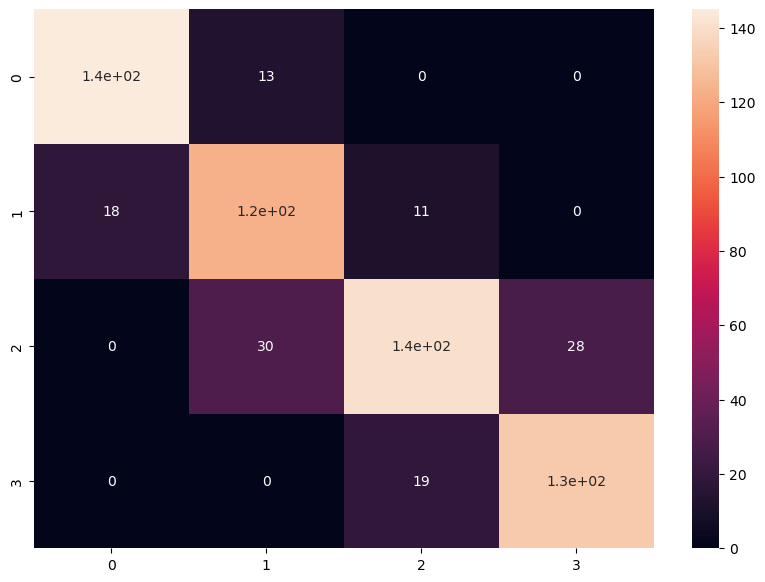

In [21]:
plt.figure(figsize = (10,7))
sns.heatmap(matrix,annot=True)


<a id="setup"></a>
## 1. Set up the environment

Before you use the sample code in this notebook, contact your Cloud Pack for Data administrator and ask for your account credentials.


### Connection to WML

Authenticate the Watson Machine Learning service on IBM Cloud Pack for Data. You need to provide platform `url`, your `username` and `api_key`.

In [22]:
api_key = '_0EMxBi6Q9AHM08jLCkNUFjshtqbFgC3TZRkYc3Ho6XC'
url = 'https://us-south.ml.cloud.ibm.com'

In [23]:
wml_credentials = {
                  "apikey":api_key,
                  "url": url
}

Alternatively you can use `username` and `password` to authenticate WML services.

```
wml_credentials = {
    "username": ***,
    "password": ***,
    "url": ***,
    "instance_id": 'openshift',
    "version": '4.0'
}

```

### Install and import the `ibm-watson-machine-learning` package
**Note:** `ibm-watson-machine-learning` documentation can be found <a href="http://ibm-wml-api-pyclient.mybluemix.net/" target="_blank" rel="noopener no referrer">here</a>.

In [24]:
!pip install -U ibm-watson-machine-learning

In [25]:
from ibm_watson_machine_learning import APIClient

client = APIClient(wml_credentials)

### Working with spaces

First of all, you need to create a space that will be used for your work. If you do not have a space, you can use `{PLATFORM_URL}/ml-runtime/spaces?context=icp4data` to create one.

- Click New Deployment Space
- Create an empty space
- Go to space `Settings` tab
- Copy `space_id` and paste it below

**Tip**: You can also use SDK to prepare the space for your work. More information can be found [here](https://github.com/IBM/watson-machine-learning-samples/blob/master/cpd4.0/notebooks/python_sdk/instance-management/Space%20management.ipynb).

**Action**: Assign space ID below

In [26]:
space_id = '3892129f-fa6f-483e-8342-23b404569257'

You can use the `list()` method to print all existing spaces.

In [27]:
client.spaces.list(limit=10)

------------------------------------  ------------  ------------------------
ID                                    NAME          CREATED
3892129f-fa6f-483e-8342-23b404569257  mobile price  2023-02-08T06:21:06.796Z
c7fde189-9369-4f38-80da-5a116ccce556  Daisy         2022-10-28T17:49:13.430Z
0f250540-e376-4eca-ac1f-11ac983641db  wine          2022-10-28T10:00:11.569Z
------------------------------------  ------------  ------------------------


To be able to interact with all resources available in Watson Machine Learning, you need to set **space** which you will be using.

In [28]:
client.set.default_space(space_id)

'SUCCESS'

### 3.1: Publish model

#### Publish the model in the Watson Machine Learning repository on Cloud.

Define model name, autor name and email.

In [29]:
sofware_spec_uid = client.software_specifications.get_id_by_name("runtime-22.1-py3.9")

In [30]:
metadata = {
            client.repository.ModelMetaNames.NAME: 'mobile_price_predictor model',
            client.repository.ModelMetaNames.TYPE: 'scikit-learn_1.0',
            client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: sofware_spec_uid
}

published_model = client.repository.store_model(
    model=knn,
    meta_props=metadata,
    training_data=X_train,
    training_target=y_train)

### 3.2: Get model details

In [31]:
import json

published_model_uid = client.repository.get_model_id(published_model)
model_details = client.repository.get_details(published_model_uid)
print(json.dumps(model_details, indent=2))

{
  "entity": {
    "hybrid_pipeline_software_specs": [],
    "label_column": "price_range",
    "schemas": {
      "input": [
        {
          "fields": [
            {
              "name": "dual_sim",
              "type": "int64"
            },
            {
              "name": "battery_power",
              "type": "int64"
            },
            {
              "name": "four_g",
              "type": "int64"
            },
            {
              "name": "n_cores",
              "type": "int64"
            },
            {
              "name": "touch_screen",
              "type": "int64"
            },
            {
              "name": "ram",
              "type": "int64"
            }
          ],
          "id": "1",
          "type": "struct"
        }
      ],
      "output": []
    },
    "software_spec": {
      "id": "12b83a17-24d8-5082-900f-0ab31fbfd3cb",
      "name": "runtime-22.1-py3.9"
    },
    "training_data_references": [
      {
        "id": "1",

### 3.3 Get all models

In [32]:
models_details = client.repository.list_models()

------------------------------------  ----------------------------  ------------------------  ----------------
ID                                    NAME                          CREATED                   TYPE
3f6fc1e6-562a-48c4-b175-72cb11720954  mobile_price_predictor model  2023-02-08T11:17:03.002Z  scikit-learn_1.0
------------------------------------  ----------------------------  ------------------------  ----------------


<a id="deploy"></a>
## 4. Deploy and score

In this section, you will learn how to create online scoring and to score a new data record by using the IBM Watson Machine Learning SDK.

### 4.1: Create a model deployment

#### Create an online deployment for the published model

In [33]:
metadata = {
    client.deployments.ConfigurationMetaNames.NAME: "Deployment of scikit model",
    client.deployments.ConfigurationMetaNames.ONLINE: {}
}

created_deployment = client.deployments.create(published_model_uid, meta_props=metadata)



#######################################################################################

Synchronous deployment creation for uid: '3f6fc1e6-562a-48c4-b175-72cb11720954' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='164eff7f-f0d3-4cad-91be-534c95ac127b'
------------------------------------------------------------------------------------------------




**Note**: Here we use the deployment url saved in the published_model object. In the next section, we show how to retrieve the deployment url from the Watson Machine Learning instance.

In [34]:
deployment_uid = client.deployments.get_id(created_deployment)

Now you can print an online scoring endpoint. 

In [35]:
scoring_endpoint = client.deployments.get_scoring_href(created_deployment)
print(scoring_endpoint)

https://us-south.ml.cloud.ibm.com/ml/v4/deployments/164eff7f-f0d3-4cad-91be-534c95ac127b/predictions


You can also list existing deployments.

In [36]:
client.deployments.list()

------------------------------------  --------------------------  -----  ------------------------
GUID                                  NAME                        STATE  CREATED
164eff7f-f0d3-4cad-91be-534c95ac127b  Deployment of scikit model  ready  2023-02-08T11:17:07.551Z
------------------------------------  --------------------------  -----  ------------------------


### 4.2: Get deployment details

In [37]:
client.deployments.get_details(deployment_uid)

Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.


{'entity': {'asset': {'id': '3f6fc1e6-562a-48c4-b175-72cb11720954'},
  'custom': {},
  'deployed_asset_type': 'model',
  'hardware_spec': {'id': 'e7ed1d6c-2e89-42d7-aed5-863b972c1d2b',
   'name': 'S',
   'num_nodes': 1},
  'name': 'Deployment of scikit model',
  'online': {},
  'space_id': '3892129f-fa6f-483e-8342-23b404569257',
  'status': {'online_url': {'url': 'https://us-south.ml.cloud.ibm.com/ml/v4/deployments/164eff7f-f0d3-4cad-91be-534c95ac127b/predictions'},
   'serving_urls': ['https://us-south.ml.cloud.ibm.com/ml/v4/deployments/164eff7f-f0d3-4cad-91be-534c95ac127b/predictions'],
   'state': 'ready'}},
 'metadata': {'created_at': '2023-02-08T11:17:07.551Z',
  'id': '164eff7f-f0d3-4cad-91be-534c95ac127b',
  'modified_at': '2023-02-08T11:17:07.551Z',
  'name': 'Deployment of scikit model',
  'owner': 'IBMid-550004NG0G',
  'space_id': '3892129f-fa6f-483e-8342-23b404569257'},
 'system': {'warnings': [{'id': 'Deprecated',
    'message': 'online_url is deprecated and will be removed